# Customer Risk Prediction using Synthetic Data

1. Import Libraries & Load Data
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Model Building (Baseline → Advanced)
5. Hyperparameter Tuning
6. Model Comparison & Conclusion

## 1. Import Libraries & Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Dataset_CDS/synthetic_data.csv")

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file(output_file="output.html")

## 2. Exploratory Data Analysis (EDA)

In [3]:
# Display concise summary of the DataFrame, including:
# - Total number of entries
# - Column names and their data types
# - Non-null value counts
# - Memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          10000 non-null  object 
 1   age                  10000 non-null  int64  
 2   income               9682 non-null   float64
 3   savings              9689 non-null   float64
 4   monthly_expenses     9675 non-null   float64
 5   num_dependents       10000 non-null  int64  
 6   credit_score         9674 non-null   float64
 7   loan_amount          10000 non-null  float64
 8   loan_term_months     10000 non-null  int64  
 9   employment_years     10000 non-null  float64
 10  home_ownership       10000 non-null  object 
 11  education            10000 non-null  object 
 12  marital_status       10000 non-null  object 
 13  region               10000 non-null  object 
 14  recent_default       10000 non-null  int64  
 15  has_credit_card      10000 non-null  

In [4]:
# Get the dimensions of the dataframe (number of rows, number of columns)
df.shape

(10000, 21)

In [5]:
# Display 5 random samples from the dataframe to get a quick overview of the data
df.sample(5)

,customer_id,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,...,education,marital_status,region,recent_default,has_credit_card,signup_date,signup_dayofweek,debt_to_income,sin_age,target_default_risk
4132,CUST006104,47,33410.0,2955.0,NaN,1,703.430452,5977.0,48,0.1,...,Bachelors,Married,East,0,1,2019-07-16,1,0.179,-0.999923,0
4241,CUST008222,38,39224.0,804.0,200.0,0,624.656331,1000.0,48,5.9,...,HS,Single,North,0,0,2021-08-14,5,0.025,-0.611858,0
4238,CUST002647,60,25346.0,4868.0,2783.0,1,703.196532,1561.0,60,6.8,...,HS,Married,East,0,1,2018-04-15,6,0.062,-0.279415,1
8319,CUST009099,65,NaN,12836.0,2767.0,0,602.079701,20769.0,36,9.4,...,Masters,Married,West,0,0,2020-04-25,5,0.451,0.215120,0
3790,CUST002900,31,85215.0,7080.0,1788.0,1,585.006873,18518.0,48,6.7,...,HS,Single,West,0,1,2020-01-29,2,0.217,0.041581,1


In [6]:
# descriptive statistics for the DataFrame for numeric columns
df.describe()

,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,recent_default,has_credit_card,signup_dayofweek,debt_to_income,sin_age,target_default_risk
count,10000.000000,9682.000000,9689.000000,9675.000000,10000.000000,9674.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.861600,59712.871411,5039.922489,2082.209612,1.214200,650.155438,16214.796900,45.642000,5.39701,0.047000,0.694800,3.011900,0.358156,-0.100387,0.513200
std,16.457987,39865.231489,5041.793583,1385.991787,1.108982,69.918297,16081.646814,15.475134,3.41370,0.211649,0.460515,2.003986,0.302606,0.667428,0.499851
min,18.000000,20001.000000,0.000000,200.000000,0.000000,363.077116,1000.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.004000,-0.999923,0.000000
25%,32.000000,31300.500000,1476.000000,1471.000000,0.000000,602.189895,8508.500000,36.000000,2.70000,0.000000,0.000000,1.000000,0.132000,-0.756802,0.000000
50%,46.000000,47301.500000,3499.000000,2007.000000,1.000000,649.808322,15174.500000,48.000000,5.10000,0.000000,1.000000,3.000000,0.275000,-0.157746,1.000000
75%,60.000000,75164.250000,6986.000000,2557.000000,2.000000,697.537432,21843.750000,60.000000,7.70000,0.000000,1.000000,5.000000,0.508000,0.515501,1.000000
max,74.000000,402769.000000,44644.000000,28664.000000,7.000000,850.000000,441190.000000,72.000000,21.50000,1.000000,1.000000,6.000000,2.031000,0.973848,1.000000


In [7]:
# check the count of null values & sort (desc)
df.isnull().sum().sort_values(ascending=False)

credit_score           326
monthly_expenses       325
income                 318
savings                311
customer_id              0
age                      0
num_dependents           0
loan_amount              0
loan_term_months         0
employment_years         0
home_ownership           0
education                0
marital_status           0
region                   0
recent_default           0
has_credit_card          0
signup_date              0
signup_dayofweek         0
debt_to_income           0
sin_age                  0
target_default_risk      0
dtype: int64

In [8]:
# Returns the sum of True values (where rows are duplicates)
df.duplicated().sum()

np.int64(0)

## 3. Data Preprocessing

In [9]:
# Get all numeric columns from the dataframe
num_cols = df.select_dtypes(include=np.number).columns

# Dictionary to store the count of outliers for each numeric column
outlier_summary = {}

# Loop through each numeric column to detect outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)

outlier_summary

{'age': 0,
 'income': 479,
 'savings': 472,
 'monthly_expenses': 70,
 'num_dependents': 24,
 'credit_score': 62,
 'loan_amount': 89,
 'loan_term_months': 0,
 'employment_years': 51,
 'recent_default': 470,
 'has_credit_card': 0,
 'signup_dayofweek': 0,
 'debt_to_income': 318,
 'sin_age': 0,
 'target_default_risk': 0}

In [10]:
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Clip values to be within the defined boundaries
    df[column] = df[column].clip(lower_limit, upper_limit)
    return df

In [11]:
# Apply IQR method to handle outliers 
outlier_cols = [
    'income',
    'savings',
    'monthly_expenses',
    'credit_score',
    'loan_amount',
    'debt_to_income'
]

for col in outlier_cols:
    treat_outliers_iqr(df, col)

In [12]:
# Create copies of columns for comparison
copied_columns: dict[str, pd.Series] = {
    'credit_score': df['credit_score'].copy(),
    'monthly_expenses': df['monthly_expenses'].copy(),
    'income': df['income'].copy(),
    'savings': df['savings'].copy()
}

In [13]:
# Get column names of numeric features
num_features = df.select_dtypes(include=np.number).columns
# Get column names of categorical features (object type)
cat_features = df.select_dtypes(include='object').columns

print('numeric features',num_features)
print('---')
print('categorical features',cat_features)  

numeric features Index(['age', 'income', 'savings', 'monthly_expenses', 'num_dependents',
       'credit_score', 'loan_amount', 'loan_term_months', 'employment_years',
       'recent_default', 'has_credit_card', 'signup_dayofweek',
       'debt_to_income', 'sin_age', 'target_default_risk'],
      dtype='object')
---
categorical features Index(['customer_id', 'home_ownership', 'education', 'marital_status',
       'region', 'signup_date'],
      dtype='object')


In [14]:
# Apply the imputer to the numerical columns in the dataframe
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [15]:
# Check the number of missing values in each column of the dataframe
df.isnull().sum()

customer_id            0
age                    0
income                 0
savings                0
monthly_expenses       0
num_dependents         0
credit_score           0
loan_amount            0
loan_term_months       0
employment_years       0
home_ownership         0
education              0
marital_status         0
region                 0
recent_default         0
has_credit_card        0
signup_date            0
signup_dayofweek       0
debt_to_income         0
sin_age                0
target_default_risk    0
dtype: int64

In [16]:
# Display summary statistics for columns with outliers
# to help understand the distribution of outlier columns
df[outlier_cols].describe()

,income,savings,monthly_expenses,credit_score,loan_amount,debt_to_income
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,57469.287212,4747.279300,2016.622600,650.175514,15549.856262,0.351123
std,33077.059791,4143.222386,786.385046,68.484462,9348.627522,0.280535
min,20001.000000,0.000000,200.000000,459.168588,1000.000000,0.004000
25%,31753.750000,1530.000000,1492.000000,604.179183,8508.500000,0.132000
50%,47301.500000,3499.000000,2007.000000,649.808322,15174.500000,0.275000
75%,73914.000000,6826.000000,2540.000000,695.500821,21843.750000,0.508000
max,140959.875000,15251.000000,4186.000000,840.558739,41846.625000,1.072000


In [17]:
# Create a figure with two subplots side by side
import seaborn as sns
import matplotlib.pyplot as plt

def plot_credit_score(original, imputed, bins=30):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(original, kde=True, bins=bins, ax=ax[0])
    ax[0].set_title("Original")

    sns.histplot(imputed, kde=True, bins=bins, ax=ax[1])
    ax[1].set_title("Imputed")

    plt.tight_layout()
    plt.show()

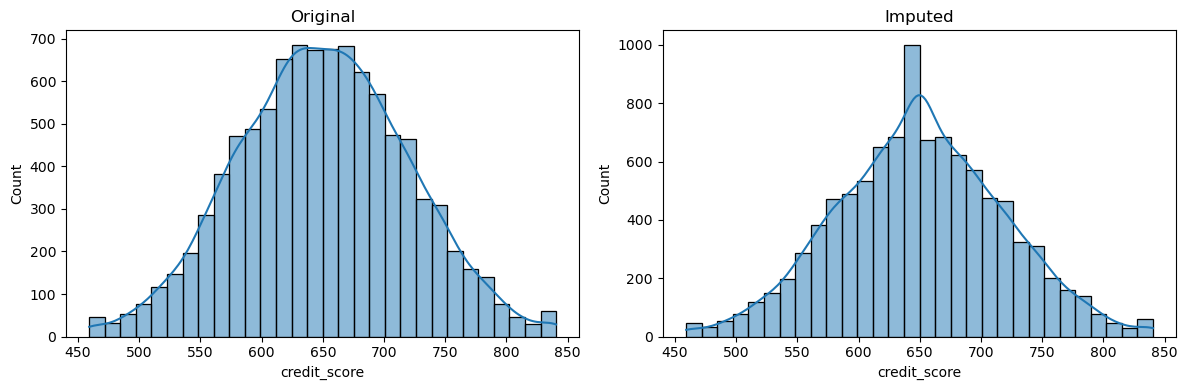

In [18]:
plot_credit_score(copied_columns['credit_score'], df['credit_score'])

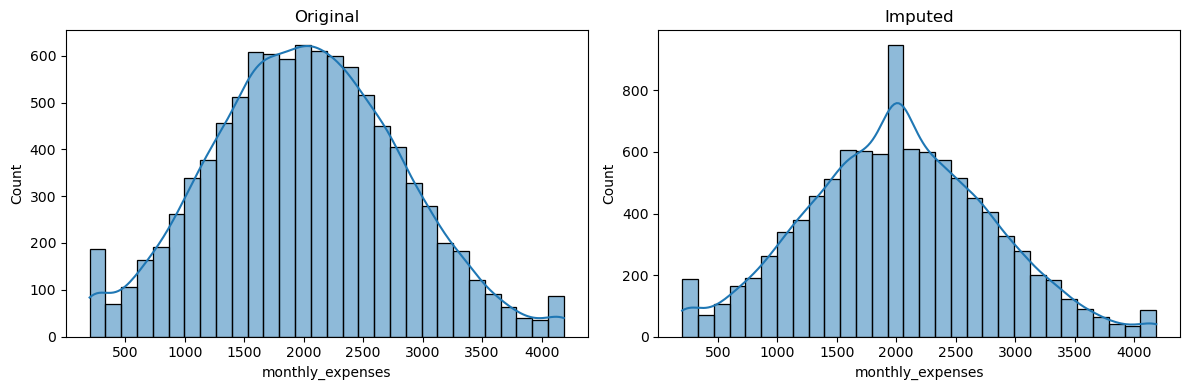

In [19]:
plot_credit_score(copied_columns['monthly_expenses'], df['monthly_expenses'])

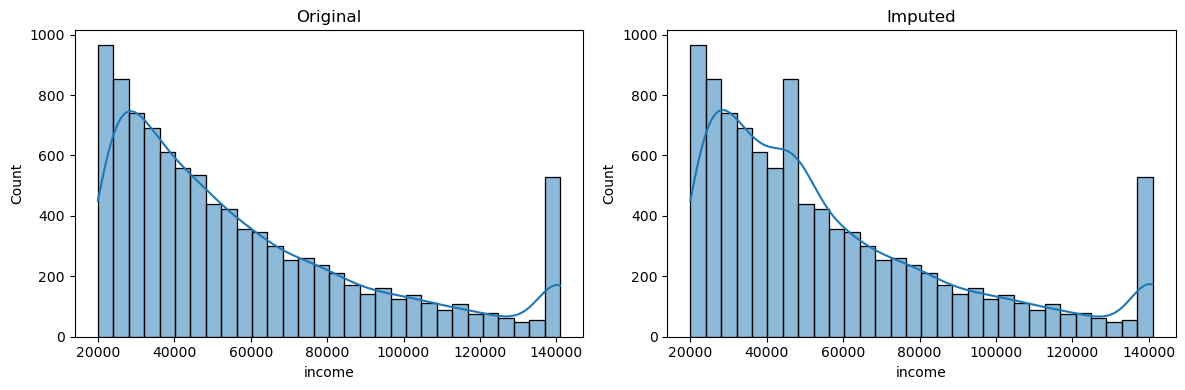

In [20]:
plot_credit_score(copied_columns['income'], df['income'])

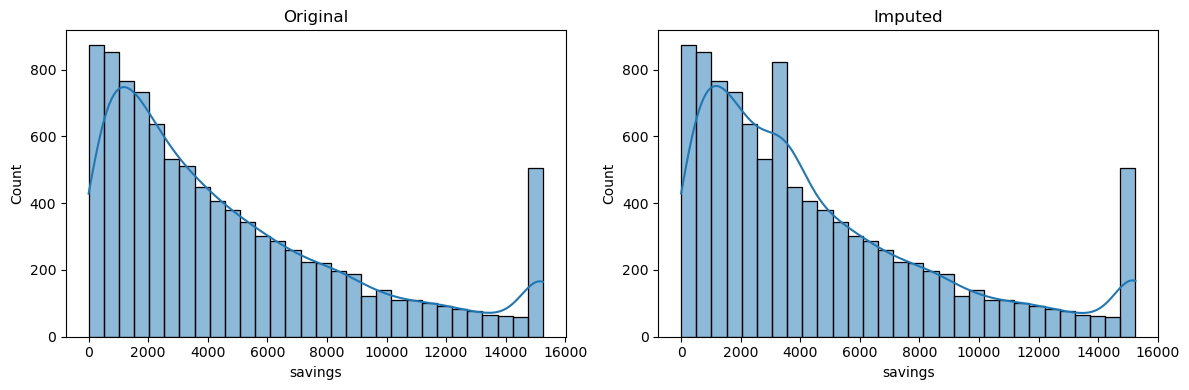

In [21]:
plot_credit_score(copied_columns['savings'], df['savings'])

In [22]:
# Loop through each categorical feature column
for col in cat_features:
    # Print the column name and its unique values
    # This helps understand the distinct categories in each categorical variable
    print(col, df[col].unique())

customer_id ['CUST006253' 'CUST004685' 'CUST001732' ... 'CUST005391' 'CUST000861'
 'CUST007271']
home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
education ['HS' 'Bachelors' 'Masters' 'Other' 'PhD' 'Bachlors']
marital_status ['Single' 'Married' 'Divorced' 'Widowed']
region ['West' 'East' 'South' 'North']
signup_date ['2020-07-05' '2018-10-03' '2018-05-30' ... '2018-12-16' '2021-08-03'
 '2019-02-21']


In [23]:
# Count the frequency of each unique value in the 'education' column
df['education'].value_counts()

education
Bachelors    4443
HS           2546
Masters      1962
Other         500
PhD           462
Bachlors       87
Name: count, dtype: int64

In [24]:
# Fix typo in education column by replacing 'Bachlors' with the correct spelling 'Bachelors'
df['education'] = df['education'].replace('Bachlors','Bachelors')

In [25]:
# Count the frequency of each unique value in the 'education' column
df['education'].value_counts()

education
Bachelors    4530
HS           2546
Masters      1962
Other         500
PhD           462
Name: count, dtype: int64

In [26]:
# Remove the customer_id column from the dataframe as it's not needed for analysis
df.drop(columns=['customer_id'], inplace=True)

In [27]:
# Convert the 'target_default_risk' column to integer type
df['target_default_risk'] = df['target_default_risk'].astype(int)

In [28]:
# Convert the 'signup_date' column to a datetime format for proper date handling
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [29]:
# Calculate loan-to-income ratio (adding 1 to avoid division by zero)
df['loan_to_income'] = df['loan_amount'] / (df['income'] + 1)

# Calculate dependents-to-income ratio (adding 1 to avoid division by zero)
df['dependents_to_income'] = df['num_dependents'] / (df['income'] + 1)

# Calculate credit score per loan amount ratio (adding 1 to avoid division by zero)
df['credit_per_loan'] = df['credit_score'] / (df['loan_amount'] + 1)

# Calculate account age in days by finding difference between today and signup date
df['account_age_days'] = (pd.Timestamp('today') - df['signup_date']).dt.days

In [30]:
# Remove the 'signup_date' column from the dataframe as it's no longer needed
df.drop(columns=['signup_date'], inplace=True)

In [31]:
# check the count of null values and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   10000 non-null  float64
 1   income                10000 non-null  float64
 2   savings               10000 non-null  float64
 3   monthly_expenses      10000 non-null  float64
 4   num_dependents        10000 non-null  float64
 5   credit_score          10000 non-null  float64
 6   loan_amount           10000 non-null  float64
 7   loan_term_months      10000 non-null  float64
 8   employment_years      10000 non-null  float64
 9   home_ownership        10000 non-null  object 
 10  education             10000 non-null  object 
 11  marital_status        10000 non-null  object 
 12  region                10000 non-null  object 
 13  recent_default        10000 non-null  float64
 14  has_credit_card       10000 non-null  float64
 15  signup_dayofweek    

In [32]:
# Identify all categorical features by selecting columns with 'object' data type
cat_features = df.select_dtypes(include='object').columns

In [33]:
# Convert categorical features to dummy/indicator variables (one-hot encoding)
# Using drop_first=True to avoid multicollinearity by removing the first category
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [34]:
# check the data using samples to get random rows
df.sample(5)

,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,recent_default,...,education_HS,education_Masters,education_Other,education_PhD,marital_status_Married,marital_status_Single,marital_status_Widowed,region_North,region_South,region_West
1962,46.0,52201.0,274.0,2852.0,3.0,716.616961,19887.0,60.0,0.1,0.0,...,False,False,False,False,False,True,False,False,False,False
6450,55.0,20949.0,15251.0,2363.0,0.0,701.360114,30055.0,60.0,8.2,0.0,...,False,False,False,False,True,False,False,False,False,False
6354,43.0,133668.0,3060.0,933.0,0.0,488.497545,27026.0,60.0,5.4,0.0,...,False,False,False,False,False,True,False,False,True,False
2215,45.0,121415.0,7283.0,1568.0,2.0,509.894136,6092.0,36.0,9.0,0.0,...,False,False,False,False,False,True,False,False,True,False
318,52.0,23773.0,15251.0,1834.0,0.0,683.473902,1000.0,24.0,9.4,0.0,...,False,False,True,False,False,True,False,False,False,False


In [35]:
# check the count of null values and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  float64
 1   income                  10000 non-null  float64
 2   savings                 10000 non-null  float64
 3   monthly_expenses        10000 non-null  float64
 4   num_dependents          10000 non-null  float64
 5   credit_score            10000 non-null  float64
 6   loan_amount             10000 non-null  float64
 7   loan_term_months        10000 non-null  float64
 8   employment_years        10000 non-null  float64
 9   recent_default          10000 non-null  float64
 10  has_credit_card         10000 non-null  float64
 11  signup_dayofweek        10000 non-null  float64
 12  debt_to_income          10000 non-null  float64
 13  sin_age                 10000 non-null  float64
 14  target_default_risk     10000 non-null 

In [36]:
# check the dimension of the data
df.shape

(10000, 32)

In [37]:
# Count the total number of missing values in the entire dataframe
df.isnull().sum().sum()

np.int64(0)

In [38]:
# Calculate the correlation matrix for all numeric columns in the dataframe
# This shows how each variable relates to others (-1 to 1)
df.corr()

,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,recent_default,...,education_HS,education_Masters,education_Other,education_PhD,marital_status_Married,marital_status_Single,marital_status_Widowed,region_North,region_South,region_West
age,1.000000,-0.022378,0.004001,-0.006055,0.008063,0.000205,0.008886,-0.004321,0.002142,-0.016766,...,0.015557,-0.014512,0.009457,-0.009728,-0.008100,0.007109,-0.011666,-0.002855,0.001695,-0.014825
income,-0.022378,1.000000,-0.000471,-0.000923,0.001415,0.004301,0.010716,0.010859,0.010696,0.001459,...,-0.008430,-0.016246,0.020018,-0.000439,0.000503,0.001127,-0.011650,0.007137,0.009075,0.007226
savings,0.004001,-0.000471,1.000000,-0.016980,-0.002526,0.008916,0.000529,-0.002422,0.000136,-0.002472,...,0.003587,0.007141,0.000884,-0.012930,-0.005332,-0.005215,0.001214,0.005558,0.000291,-0.000887
monthly_expenses,-0.006055,-0.000923,-0.016980,1.000000,0.006780,0.000268,0.028579,-0.011961,0.002969,-0.025889,...,-0.009083,0.003972,0.004321,0.007136,0.002908,-0.005569,-0.005571,-0.004920,0.011490,-0.015937
num_dependents,0.008063,0.001415,-0.002526,0.006780,1.000000,0.000337,0.001349,0.003700,-0.000246,-0.007105,...,-0.009595,-0.012321,0.018578,0.007750,0.009161,-0.001251,-0.013776,-0.016499,0.006971,-0.018825
credit_score,0.000205,0.004301,0.008916,0.000268,0.000337,1.000000,0.001995,0.002999,-0.019690,-0.012135,...,-0.001121,-0.003615,0.014954,-0.001487,0.008416,-0.007711,-0.007480,0.003957,0.006602,-0.009826
loan_amount,0.008886,0.010716,0.000529,0.028579,0.001349,0.001995,1.000000,-0.012538,-0.011983,0.001638,...,-0.003000,-0.003911,0.007551,0.009564,0.005174,-0.016495,0.022893,0.009156,-0.004120,0.000398
loan_term_months,-0.004321,0.010859,-0.002422,-0.011961,0.003700,0.002999,-0.012538,1.000000,0.012418,-0.017458,...,-0.001907,-0.006145,0.004003,-0.005621,0.015415,-0.003976,-0.020193,-0.022786,0.011386,0.007838
employment_years,0.002142,0.010696,0.000136,0.002969,-0.000246,-0.019690,-0.011983,0.012418,1.000000,0.001828,...,-0.022735,0.000344,0.015403,0.015055,0.007861,0.005102,-0.009340,0.003549,0.019698,0.000205
recent_default,-0.016766,0.001459,-0.002472,-0.025889,-0.007105,-0.012135,0.001638,-0.017458,0.001828,1.000000,...,0.013382,-0.000255,0.009756,-0.003858,0.010518,-0.003650,0.002007,-0.000561,-0.010423,0.005590


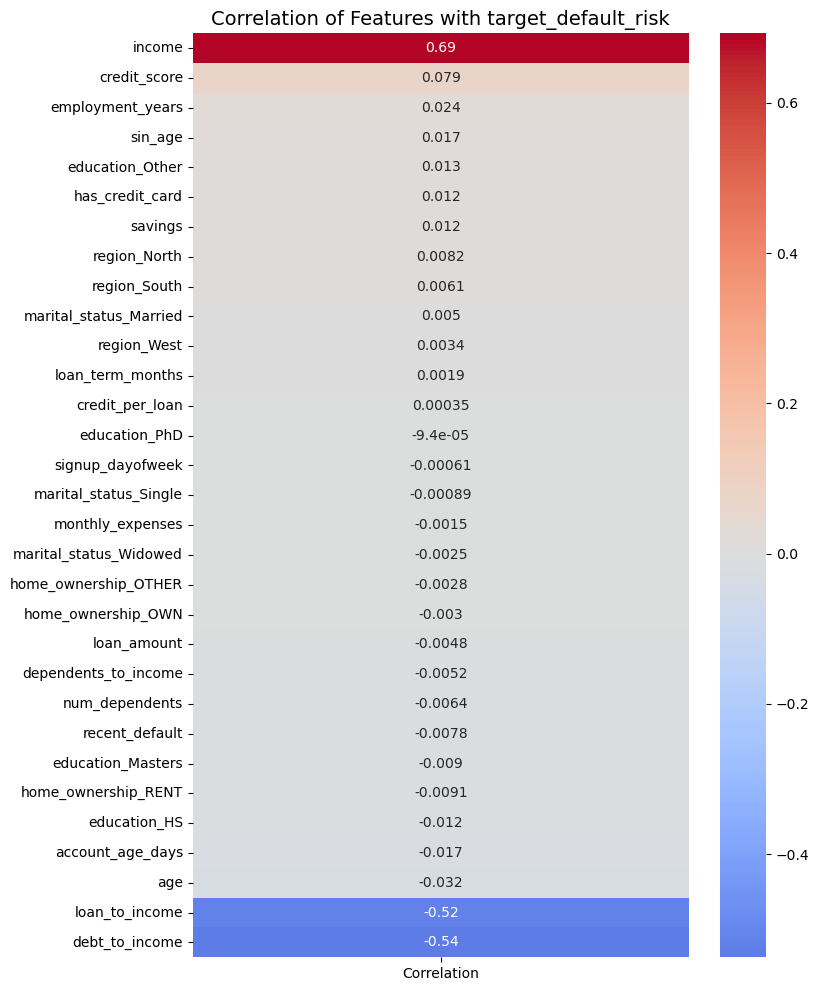

In [39]:
# Correlation values with target_default_risk
corr_values = {
    "age": -0.032432,
    "income": 0.692583,
    "savings": 0.011621,
    "monthly_expenses": -0.001546,
    "num_dependents": -0.006364,
    "credit_score": 0.078863,
    "loan_amount": -0.004835,
    "loan_term_months": 0.001930,
    "employment_years": 0.023547,
    "recent_default": -0.007756,
    "has_credit_card": 0.012114,
    "signup_dayofweek": -0.000611,
    "debt_to_income": -0.537308,
    "sin_age": 0.017490,
    "loan_to_income": -0.517086,
    "dependents_to_income": -0.005181,
    "credit_per_loan": 0.000347,
    "account_age_days": -0.017296,
    "home_ownership_OTHER": -0.002829,
    "home_ownership_OWN": -0.002960,
    "home_ownership_RENT": -0.009140,
    "education_HS": -0.012220,
    "education_Masters": -0.009017,
    "education_Other": 0.013219,
    "education_PhD": -0.000094,
    "marital_status_Married": 0.004971,
    "marital_status_Single": -0.000891,
    "marital_status_Widowed": -0.002504,
    "region_North": 0.008237,
    "region_South": 0.006079,
    "region_West": 0.003364
}

# Convert to DataFrame
df_corr = pd.DataFrame.from_dict(corr_values, orient='index', columns=['Correlation'])

# Sort by correlation strength
df_corr_sorted = df_corr.sort_values(by='Correlation', ascending=False)

# Plot heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(df_corr_sorted, annot=True, cmap="coolwarm", center=0, cbar=True)
plt.title("Correlation of Features with target_default_risk", fontsize=14)
plt.show()

In [40]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X = df.drop('target_default_risk', axis=1)
y = df['target_default_risk']

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Scale only for RFE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RFE with Logistic Regression
selector = RFE(
    estimator=LogisticRegression(max_iter=3000, solver='lbfgs'),
    n_features_to_select=18
)
selector.fit(X_train_scaled, y_train)

# Get selected feature indices
selected_features = selector.get_support(indices=True)
print("Selected feature indices:", selected_features)

Selected feature indices: [ 0  1  2  4  5  6  8  9 10 11 12 14 15 17 18 20 27 29]


In [42]:
# If X_train is a pandas DataFrame
X_train_rfe = X_train.iloc[:, selected_features]
X_test_rfe = X_test.iloc[:, selected_features]

In [43]:
selected_features = X_train.columns[selector.support_]
print(selected_features)

Index(['age', 'income', 'savings', 'num_dependents', 'credit_score',
       'loan_amount', 'employment_years', 'recent_default', 'has_credit_card',
       'signup_dayofweek', 'debt_to_income', 'loan_to_income',
       'dependents_to_income', 'account_age_days', 'home_ownership_OTHER',
       'home_ownership_RENT', 'marital_status_Widowed', 'region_South'],
      dtype='object')


## 4. Model Building & Hyperparameter Tuning Model Comparison & Conclusion

## Linear model- Logistic regression

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

In [63]:
from sklearn.linear_model import LogisticRegression

# 1. parameter grid for Logistic Regression
param_grid_lr = {
    'lr__penalty': ['l1', 'l2'],
    'lr__C': [0.01, 0.1, 1, 10, 100],
    'lr__solver': ['liblinear', 'saga'], # 'l1' penalty only works with 'liblinear' and 'saga'
    'lr__max_iter': [3000, 4000, 5000]
}

# Create pipeline: scaling + logistic regression
pipe = Pipeline([
    ('scaler', StandardScaler()), # scale features
    ('lr', LogisticRegression()) # fit logistic regression
])

# 2. Initialize GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid_lr,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# 3. Fit GridSearchCV on the resampled training data
grid_search_lr.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.01, 0.1, 1, 10, 100],
                         'lr__max_iter': [3000, 4000, 5000],
                         'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['liblinear', 'saga']},
             scoring='roc_auc', verbose=2)

In [70]:
# Get the best trained model
best_model_lr = grid_search_lr.best_estimator_
print("Best Params:", grid_search_lr.best_params_) # the best hyperparameters found.
print("CV Accuracy:", grid_search_lr.best_score_) # the best cross-validation score.

Best Params: {'lr__C': 0.01, 'lr__max_iter': 5000, 'lr__penalty': 'l2', 'lr__solver': 'saga'}
CV Accuracy: 0.9569432248376813


In [71]:
# Predict
y_pred = best_model_lr.predict(X_test_rfe)
y_proba = best_model_lr.predict_proba(X_test_rfe)[:,1]  # probability of positive class

In [72]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.946
AUC-ROC: 0.9664112940347677

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       974
           1       0.97      0.93      0.95      1026

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000


Confusion Matrix:
 [[942  32]
 [ 76 950]]


In [66]:
# Cross-validation for robustness
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(best_model_lr, X, y, cv=cv, scoring='roc_auc')
print("Cross-validated AUC:", cv_auc.mean())

Cross-validated AUC: 0.9583942630939205


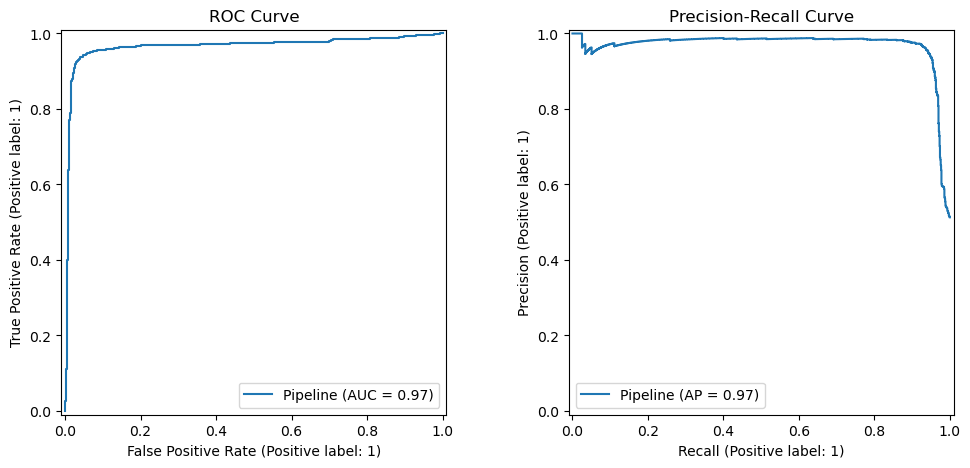

In [67]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 1. Plot ROC Curve
RocCurveDisplay.from_estimator(best_model_lr, X_test_rfe, y_test, ax=ax1)
ax1.set_title("ROC Curve")

# 2. Plot Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(best_model_lr, X_test_rfe, y_test, ax=ax2)
ax2.set_title("Precision-Recall Curve")

plt.show()

## Tree based model- Decision tree classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

In [50]:
# Initialize model
dtc = DecisionTreeClassifier(random_state=42)

# GridSearchCV
dtc_grid = GridSearchCV(
    estimator=dtc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=1
)

dtc_grid.fit(X_train_rfe, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [51]:
# Get the best trained model
best_model_dtc = dtc_grid.best_estimator_

print("Best Params:", dtc_grid.best_params_) # the best hyperparameters found.
print("CV Accuracy:", dtc_grid.best_score_) # the best cross-validation score.

Best Params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
CV Accuracy: 0.93925


In [53]:
# Use the best estimator for predictions
y_predt_dtc= best_model_dtc.predict(X_test_rfe)

# Get probability of positive class for ROC-AUC
y_proba_dtc = best_model_dtc.predict_proba(X_test_rfe)[:,1]

In [54]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_predt_dtc))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_dtc))
print("\nClassification Report:\n", classification_report(y_test, y_predt_dtc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predt_dtc))

Accuracy: 0.9455
AUC-ROC: 0.9605598384507927

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       974
           1       0.94      0.95      0.95      1026

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000


Confusion Matrix:
 [[917  57]
 [ 52 974]]


In [59]:
# Cross-validation for robustness
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(best_model, X, y, cv=cv, scoring='accuracy')
print("Cross-validated AUC:", cv_auc.mean())

Cross-validated AUC: 0.9372


## Margin based model- Support vector classifier

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_model= SVC(
    probability=True,
    random_state=42
)

In [ ]:
param_grid = {
    'kernel': ['rbf','poly', 'sigmoid'],
    'C': [1, 3, 5, 10, 20, 50],
    'gamma': ['scale', 0.01, 0.03, 0.05, 0.1, 0.5],
    'class_weight': [None, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm_grid = GridSearchCV(
    svm_model,
    param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
)

svm_grid.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
# Get the best trained model
best_model = grid.best_estimator_

print("Best Params:", svm_grid.best_params_) # the best hyperparameters found.
print("CV Accuracy:", svm_grid.best_score_) # the best cross-validation score.
print("CV Accuracy:", svm_grid.cv_results_) # detailed results for all parameter sets.

In [ ]:
# Use the best estimator for predictions
y_pred_svm = best_model.predict(X_test_rfe)

# Get probability of positive class for ROC-AUC
y_proba_svm = best_model.predict_proba(X_test_rfe)[:,1]

In [150]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.952
AUC-ROC: 0.9656557833095171

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       974
           1       0.97      0.93      0.95      1026

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000


Confusion Matrix:
 [[947  27]
 [ 69 957]]


In [ ]:
# Cross-validation for robustness
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(grid, X, y, cv=cv, scoring='roc_auc')
print("Cross-validated AUC:", cv_auc.mean())

## Tree based Model- Random forest classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV

In [106]:
from sklearn.model_selection import GridSearchCV

# grid 'Best Params'
param_grid = {
    'n_estimators': [500, 600],
    'max_depth': [20, 25, 30],
    'max_features': [0.4, 0.5],
    'min_samples_split': [2], 
    'bootstrap': [False],    
    'class_weight': [None, 'balanced_subsample'] 
}

rfc_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
New Best Accuracy: 0.9493750000000001


In [158]:
# best parameters and CV score
print("Best Params:", grid_search_rf.best_params_)
print("CV Accuracy:", grid_search_rf.best_score_)

# Store the best estimator
best_rf_model = grid_search_rf.best_estimator_

Best Params: {'bootstrap': False, 'class_weight': 'balanced_subsample', 'max_depth': 30, 'max_features': 0.5, 'min_samples_split': 2, 'n_estimators': 500}
CV Accuracy: 0.9493750000000001


In [159]:
# Predictions
y_pred_train = best_rf_model.predict(X_train_rfe)
y_pred_test  = best_rf_model.predict(X_test_rfe)

# Get probability of positive class for ROC-AUC
y_proba = best_rf_model.predict_proba(X_test_rfe)[:,1]

In [160]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9545
AUC-ROC: 0.9836834700257374

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       974
           1       0.96      0.95      0.96      1026

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000


Confusion Matrix:
 [[934  40]
 [ 51 975]]


In [131]:
from sklearn.model_selection import cross_val_score

# Cross-validation for robustness
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(best_rf_model, X, y, cv=cv, scoring='accuracy')
print("Cross-validated AUC:", cv_auc.mean())

Cross-validated AUC: 0.9529


## Tree based model- XGBoost

In [44]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [169]:
import xgboost as xgb
model= xgb.XGBClassifier(random_state=42)

In [170]:
xgb_model.fit(X_train_rfe,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [171]:
# Predictions
y_pred_train = model.predict(X_train_rfe)
y_pred_test  = model.predict(X_test_rfe)

# Get probability of positive class for ROC-AUC
y_proba = model.predict_proba(X_test_rfe)[:,1]

In [172]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Accuracy: 0.9585
AUC-ROC: 0.9826252546721583

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       974
           1       0.96      0.96      0.96      1026

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000


Confusion Matrix:
 [[937  37]
 [ 46 980]]


In [78]:
!git clone https://github.com/Chandan-Reddy-41/credit-risk-prediction.git

Cloning into 'credit-risk-prediction'...


In [ ]:
# 1. Initialize git in your project folder
git init

# 2. Add all your project files
git add .

# 3. Create your first commit
git commit -m "Initial commit: Credit Risk Prediction Project"

# 4. Set the branch to 'main'
git branch -M main

# 5. Link your local folder to your NEW GitHub repository
# (Ensure this URL matches your GitHub username)
git remote add origin https://github.com/Chandan-Reddy-41/credit-risk-prediction.git

# 6. Push your files to GitHub
git push -u origin main